In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [9]:
df_info = pd.read_csv('clean_data.csv')
df_info.head()

,Id,Title,Price(Triệu/tháng),Square(m²),District,City,Date
0,478324,Cho thuê phòng để ở tại 108/64A1 Trần Quang Di...,3.5,18.0,Quận 3,Hồ Chí Minh,20/06/2020
1,728993,Phòng vừa xây xong thoáng mát gần các trường Đ...,3.3,25.0,Quận 7,Hồ Chí Minh,17/10/2018
2,781296,Cần share lại gấp phòng trọ mới thuê tại đường...,3.0,15.0,Quận 10,Hồ Chí Minh,05/10/2018
3,781448,Chính chủ cho thuê căn hộ dịch vụ gần sân bay ...,7.0,27.0,Tân Bình,Hồ Chí Minh,06/10/2018
4,789361,"Phòng cho thuê giá rẻ, Quận Gò Vấp gần chung c...",1.7,12.0,Gò Vấp,Hồ Chí Minh,09/10/2018


In [10]:
df_info["Date"] = df_info["Date"].str.replace('\n','')
df_info["Date"] = pd.to_datetime(df_info["Date"],format = "%d/%m/%Y ",errors = 'coerce')

### Phân tích giá nhà trung bình theo từng loại phòng của các quận trong thành phố Hồ Chí Minh theo tháng

Một tiêu chí khá quan trọng trong việc lựa chọn phòng trọ đó là loại phòng trọ. Một số người sẽ ưu tiên việc chọn những loại phòng cho diện tích nhỏ và giá cao hơn nhưng là loại phòng mong muốn, còn một số khác lại chọn những loại phòng có giá thấp hơn và diện tích tốt hơn (nhiều người muốn ở Căn hộ dù giá cao hơn các loại phòng khác hoặc thích ở loại phòng Kí túc xá do thường có giá thấp hơn, hoặc ở ghép để có thể có giá rẻ hơn,...). 

Những lựa chọn này là tuỳ vào sở thích, thu cầu và điều kiện kinh tế của mỗi người. Để cho mọi người có thể lựa chọn được loại phòng có diện tích giá cả phù hợp theo từng khu vực trên địa bàn thành phố thì chúng ta có trực quan hoá giá thuê, diện tích theo từng loại phòng và địa điểm. Từ đó có được giá cả trung bình trên từng loại phòng của từng khu vực. Nhờ đó mà có thể có chọn được những phòng có giá cả phải chăng của từng loại phòng của từng khu vực trên thành phố Hồ Chí Minh

# Trực quan hoá để trả lời câu hỏi 

Phân loại nhà trọ theo Title. Dựa vào Title, ta chia nhà cho thuê thành 5 loại gồm:  'Căn hộ', 'Phòng trọ', 'Phòng ở ghép', 'KTX' và 'Khác'

In [11]:
def type_data(df_info):
    Type = []
    for i in df_info["Title"]:
        a = i.upper().replace(' ','')
        if "KTX" in a or 'TÚC' in a:
            Type.append("KTX")
        elif "GHÉP" in a:
            Type.append("Phòng ở ghép")
        elif "HỘ" in a or "CƯ" in a or "HỘ" in a:
            Type.append("Căn hộ")
        elif "PHÒNG" in a or "TRỌ" in a or "PHÒNG" in a or "NHÀTRỌ" in a:
            Type.append("Phòng trọ")
        else:
            Type.append("Khác")
    df_info['Type'] = Type
    return df_info
df_info = type_data(df_info)

Ta sẽ phân tích 9 quận có nhiều phòng cho thuê nhất để trực quan hoá về giá nhà, diện tích và loại phòng để biết được tương quan giữa các cột này.

Lấy 9 quận có nhiều phòng cho thuê nhất để trực quan hoá

In [12]:
list_district = np.array(df_info["District"].value_counts().index[0:9])
list_district.sort()

Hàm tính giá trung bình trên 25 m² theo tháng của từng loại phòng theo quận

In [13]:
def type_price_District(df_info_most, District):
    dict_price = {}
    type_ = ['Căn hộ', 'Phòng trọ', 'Phòng ở ghép', 'KTX', 'Khác']
    for i in type_:
        dict_price[i] = (df_info_most[(df_info_most["District"] == District) & (df_info_most["Type"] == i)& 
                        pd.notna(df_info["Price(Triệu/tháng)"])  & pd.notna(df_info["Square(m²)"])]["Price(Triệu/tháng)"].sum()/
                        df_info_most[(df_info_most["District"] == District) & (df_info_most["Type"] == i) & 
                        pd.notna(df_info["Price(Triệu/tháng)"])  & pd.notna(df_info["Square(m²)"])]["Square(m²)"].sum())*25
    for i in dict_price.keys():
        if pd.isna(dict_price[i]):
            dict_price[i] = 0
    return dict_price

Trực quan hoá theo từng quận và cả thành phố Hồ Chí Minh

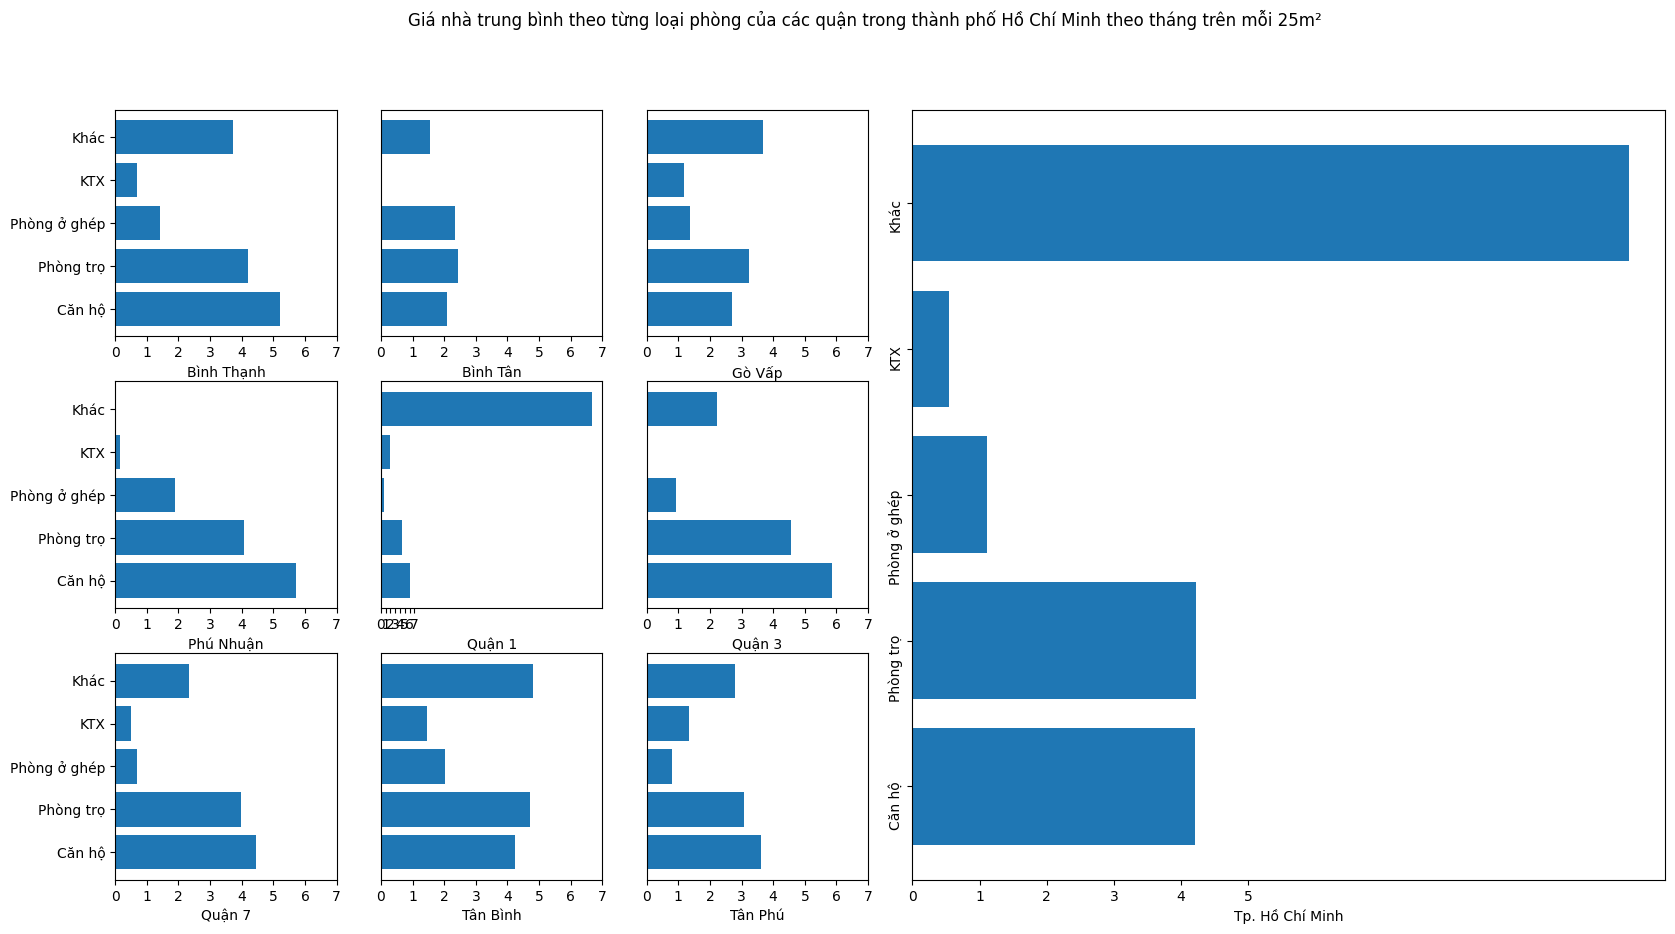

In [14]:
type_ = ['Căn hộ', 'Phòng trọ', 'Phòng ở ghép', 'KTX', 'Khác']
fig = plt.figure(figsize=(20,10))
ax = []
for i in range(0,9):
    ax.append(plt.subplot2grid((3, 6), (i//3,i % 3),colspan=1,rowspan=1))
ax.append(plt.subplot2grid((3, 6), (0, 3) ,colspan=3 ,rowspan=3))
for i in range(len(list_district)):
    ax[i].barh(type_,pd.Series(type_price_District(df_info,list_district[i])).values)
    ax[i].set_xlabel(list_district[i])
    ax[i].set_xticks(range(0,8))
    if (i not in [0,3,6]):
        ax[i].set_yticks([])

dict_price = {}
for i in type_:
    dict_price[i] = (df_info[(df_info["Type"] == i)& pd.notna(df_info["Price(Triệu/tháng)"])  & pd.notna(df_info["Square(m²)"])]["Price(Triệu/tháng)"].sum()/
                    (df_info[(df_info["Type"] == i) &pd.notna(df_info["Price(Triệu/tháng)"])  & pd.notna(df_info["Square(m²)"])]["Square(m²)"].sum()))*25
ax[-1].barh(type_,pd.Series(dict_price).values)
ax[-1].set_xlabel("Tp. Hồ Chí Minh")
ax[-1].set_xticks(range(0,6))
ax[-1].set_yticklabels(ax[-1].get_yticklabels(),rotation=90)
plt.suptitle("Giá nhà trung bình theo từng loại phòng của các quận trong thành phố Hồ Chí Minh theo tháng trên mỗi 25m²")
plt.show()

Nhận xét sơ bộ:
- Loại phòng 'Căn hộ' có giá cao nhất trên cùng một diện tích. Chắc là do loại phòng này thì có lẻ có nhiều tiện ích, an ninh và riêng tư các loại phòng khác.
- Loại phòng 'Phòng trọ' có giá cao thứ 2 trên cùng một diện tích. Chắc là do loại phòng này thì có lẻ an ninh và riêng tư và diện tích cũng lớn các loại phòng khác.
- Loại phòng 'Phòng ở ghép' có giá thấp nhì trên cùng một diện tích. Chắc là do loại phòng này thì có lẻ không riêng tư do sống chung với người lạ và diện tích cũng nhỏ hơn.
- Loại phòng 'Kí túc xá' có giá thấp nhất trên cùng một diện tích. Chắc là do loại phòng này thì có lẻ không riêng tư do sống chung với người lạ và diện tích cũng thuộc loại nhỏ nhất.
- Loại phòng 'Khác' có giá giao động mạnh trên cùng một diện tích. Chắc là do loại phòng này thì có nhiều dạng cho thuê khác nhau nên giá của nó cũng không ổn định.


Dựa vào nhận xát và biều đồ trên thì chúng ta khi lựa phòng thì đã có thể cái nhìn tổng quan về giá phòng và diện tích của từng loại phòng. Nhờ đó có thể tránh được những phòng có giá quá cao so với mặt bằng chung và chọn cho mình những phòng phù hợp với nhu cầu và điều kiện của bản thân.